In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

#### Work breakdown:
Havryliuk Olha - task 1 (1-3) \\
Mykytyshyn Iaryna - task 1 (4-6) \\
Kucheruk Anastasia - task 2


## 1.

### 1.1 Image preparation

First, load image 1, resize it to a more convenient form, and examine its representation.

The shape of the image is (500, 500, 3)


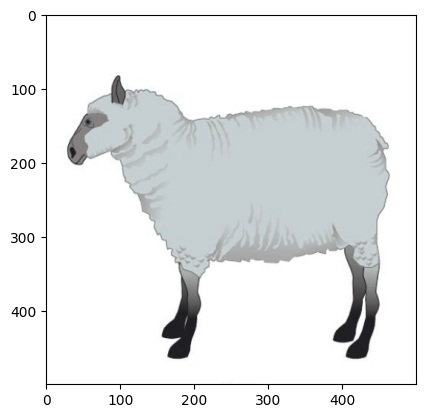

In [ ]:
img1_path = '/sheep.png'
image = cv.imread(img1_path)

resized = cv.resize(image, (500,500))

print(f"The shape of the image is {resized.shape}")

plt.imshow(resized)

 What is this image's shape? What do the values mean?

*The shape of the resized image is (500, 500 ,3). The first value represents the height and of the image in pixels The second value represents the widht of the image. Third value represents the number of color channels in the image. Here we have 3 color channels - red, green and blue. So we can say, that we have a photo in RGB format.*

### 1.2 Rotation matrix

Rotation is a linear transformation of some space that preserves at least one point. An example of rotation by angle $\psi$ on xy-plane is depicted on the image below:   
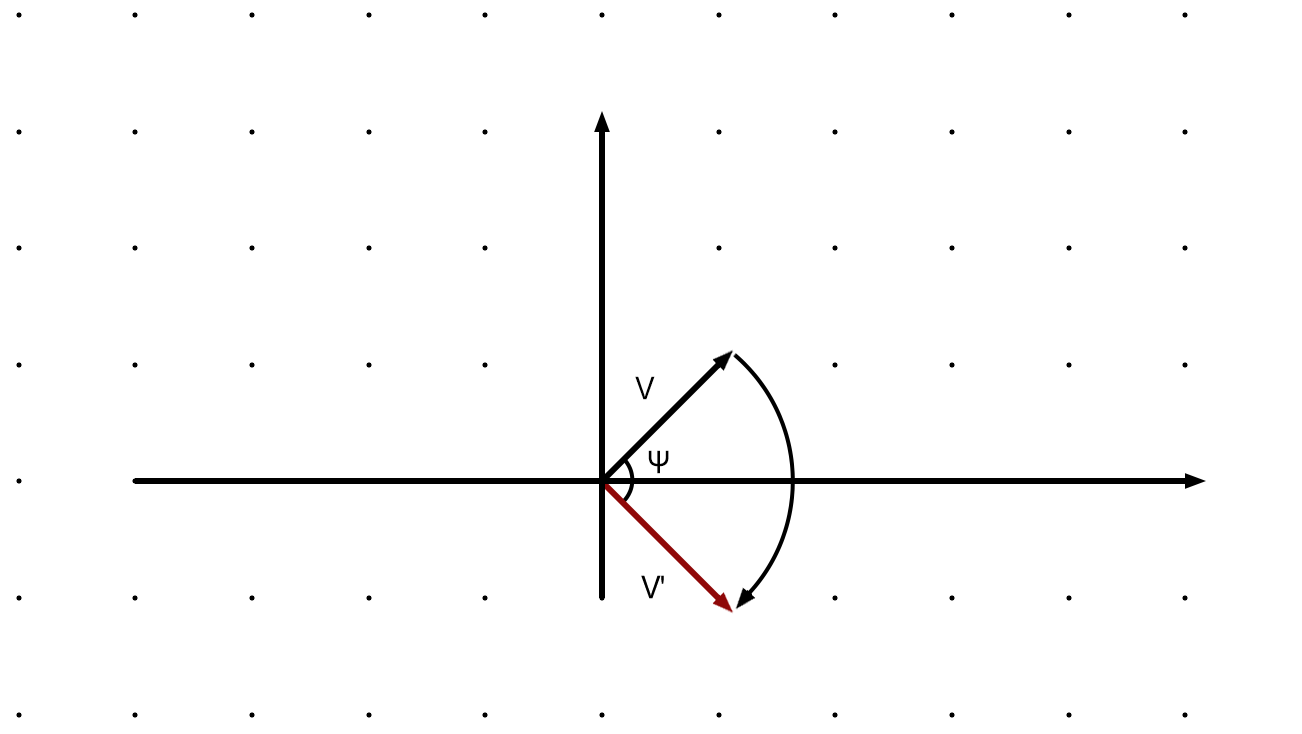

What is the transformation matrix that corresponds to rotation by a generic angle $\phi$?

$M=
\begin{pmatrix}\cos(\phi)&\sin(\phi)\\-\sin(\phi)&\cos(\phi)\end{pmatrix}$

Matrix M keeps the origin fixed and rotates other points in the plane around the origin by the angle $\phi$.

Your next task is to implement a function that calculates the rotation matrix and apply it to a vector to rotate it by $45^\circ$.
First, construct the rotation matrix:

In [ ]:
def get_rotation_matrix(phi):
    phi_radians = np.radians(phi)
    cos_phi = np.cos(phi_radians)
    sin_phi = np.sin(phi_radians)
    matrix = np.array([[cos_phi, -sin_phi], [sin_phi, cos_phi]])
    return matrix

phi = 45
M = get_rotation_matrix(phi)
print(M)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Second, we'll apply the transformation to a vector. Let's check what our vector looks like now:


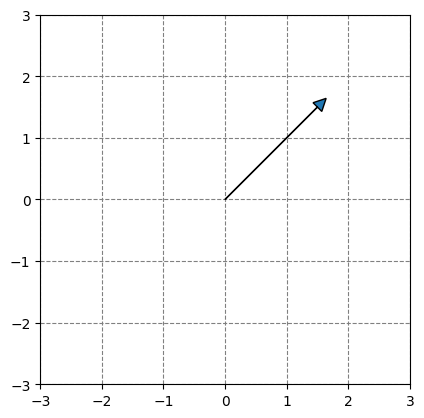

In [ ]:
A = np.array([0, 0])
B1 = np.array([1.5, 1.5])

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

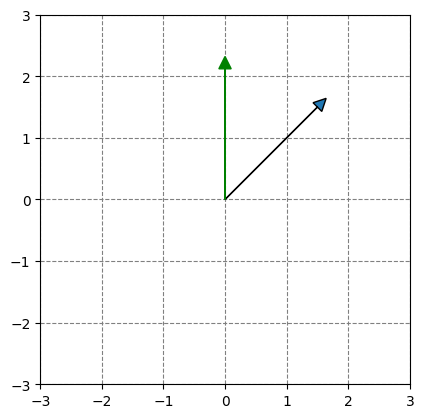

In [ ]:
A = np.array([0, 0])
B1 = np.array([1.5, 1.5])
M = get_rotation_matrix(phi)
B2 = np.dot(M, B1)

ax = plt.axes()
ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

You can also rotate images! There is image rotated by 45 degrees. Rotate it back with transformation matrix, so it will look like **sheep.png**:

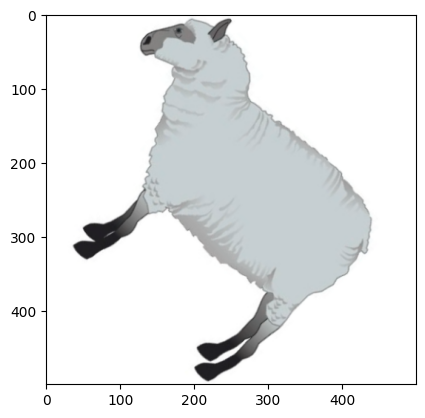

In [ ]:
rotated_img = cv.imread("/rotated_sheep.png")
plt.imshow(rotated_img)

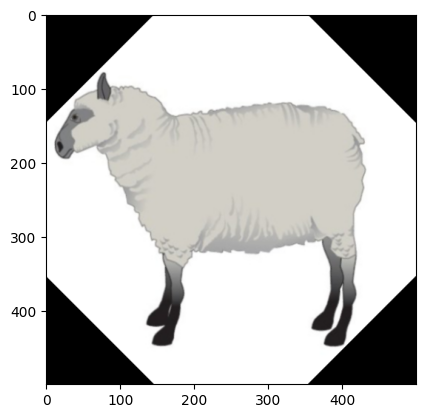

In [ ]:
def inverse_rotation(phi, center_x, center_y):
    phi_radians = np.radians(-phi)
    cos_phi = np.cos(phi_radians)
    sin_phi = np.sin(phi_radians)
    return np.array([
        [cos_phi, -sin_phi, center_x * (1 - cos_phi) + center_y * sin_phi],
        [sin_phi, cos_phi, center_y * (1 - cos_phi) - center_x * sin_phi]
])

height=rotated_img.shape[0]
width = rotated_img.shape[1]
center_x= width // 2
center_y= height // 2
rotation_matrix = inverse_rotation(45, center_x, center_y)

restored_img = cv.warpAffine(rotated_img, rotation_matrix, (width, height),
                                       flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)


plt.figure()
plt.imshow(cv.cvtColor(restored_img, cv.COLOR_BGR2RGB))
plt.show()

### 1.3 Scaling matrix

Scaling is a tranformation that enlarges or diminishes objects by a factor. For scaling in 2D space a factor can be represented as a vector $(x_s, y_s)$ where $x_s$ and $y_s$ are scaling factors for each respective axis (those factors don't have to be equal). On the picture below, V' represents vector V scaled by a factor (0.5, 1) and V'' - by (0.5, 0.5).
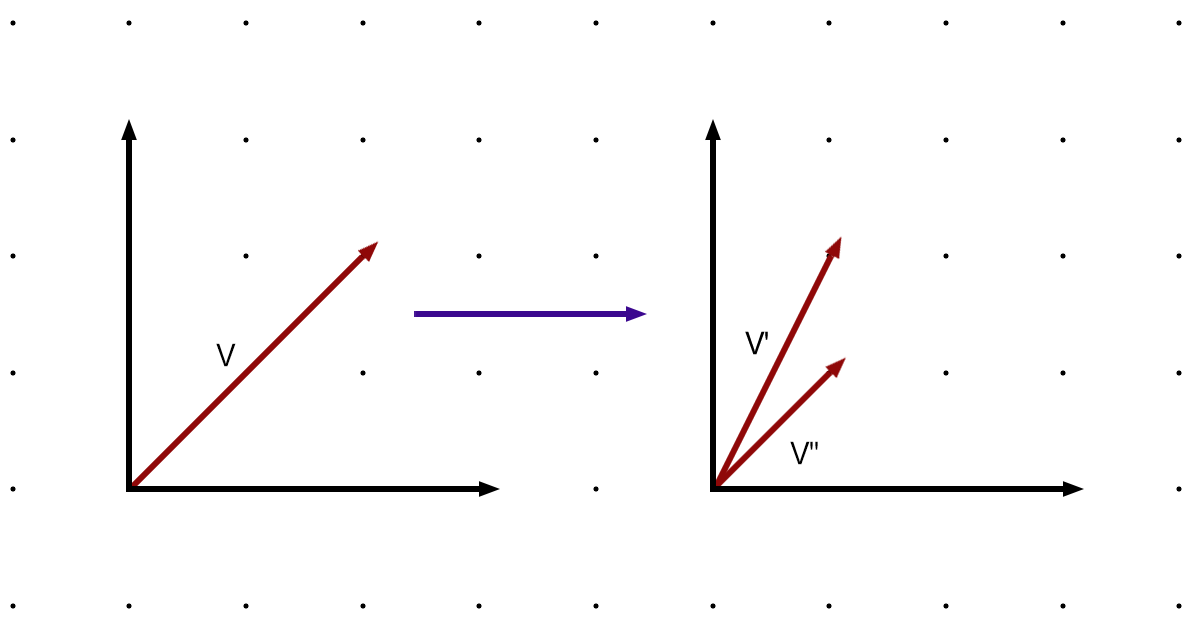

In this part, you should derive a general form for a scaling matrix and apply scaling by a factor of (1, 0.5) to the vector. First, explain how you derive the scaling matrix:

A scaling transformation changes the size of object without changing its shape. It is a linear transformation that scales objects along different axes.

To derive the general form of scaling matrix, I will consider the effects of scaling on the standard basis vectors, $ \mathbf{e}_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $ and $ \mathbf{e}_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $.

Scaling these vectors by  $ (x_s, y_s) $ means:
- Multiplying the x-coordinates of all points by $ x_s $ => scaling the $ \mathbf{e}_1 $ vector by $ x_s $.
- Multiplying the y-coordinates of all points by $ y_s $ => scaling the $ \mathbf{e}_2 $ vector by $ y_s $.


General represantation of scaling matrix:

$
S = \begin{pmatrix}
x_s & 0 \\
0 & y_s
\end{pmatrix}$

When $ S $ is multiplied by a vector $ \mathbf{v} = \begin{pmatrix} x \\ y \end{pmatrix} $, in the result we will have new vector $ \mathbf{v}' = \begin{pmatrix} x_s \cdot x \\ y_s \cdot y \end{pmatrix} $, where:
- The x-coordinate is scaled by $x_s$
- The y-coordinate is scaled by $ y_s $

In [ ]:
def get_scaling_matrix(scale_factor_x, scale_factor_y):
    return np.array([[scale_factor_x, 0], [0, scale_factor_y]], dtype =np.float32)

M2 = get_scaling_matrix(1, 0.5)
print("Scaling matrix is")
print(M2)

Scaling matrix is
[[1.  0. ]
 [0.  0.5]]


Second, apply scaling by (1, 0.5) to the vector.

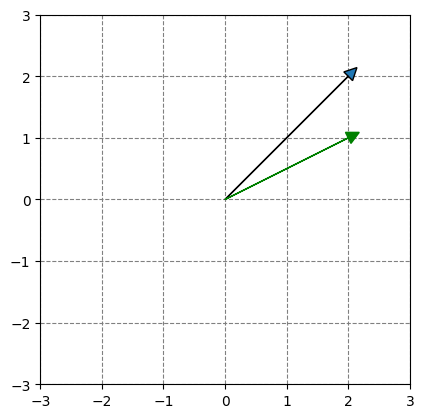

In [ ]:
A = np.array([0, 0])
B1 = np.array([2, 2])

B2 = np.dot(M2, B1)

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Now, apply scaling by some factor to the image (scaled by a factor of (1, 0.5) before) to restore the **sheep.png**:

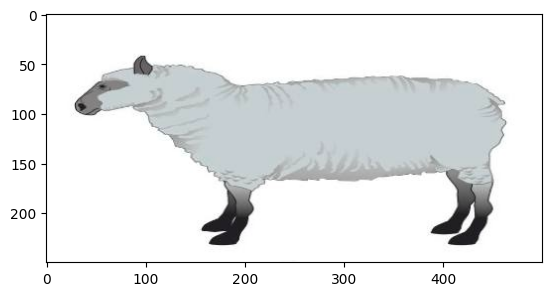

In [ ]:
scaled_img = cv.imread("/scaled_sheep.png")
plt.imshow(scaled_img)

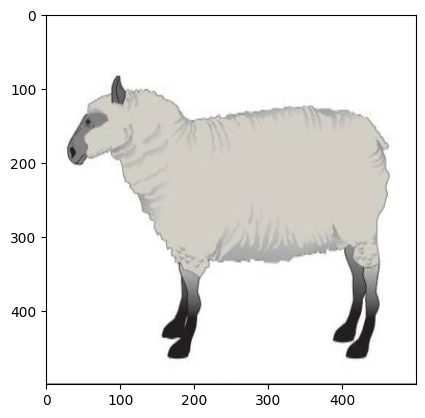

In [ ]:
scaling_matrix = get_scaling_matrix(1,2)
scaling_matrix = np.append(scaling_matrix, np.array([[0],[0]], dtype="float32"), axis=1)

heigh = scaled_img.shape[0]
width = scaled_img.shape[1]


restored_img = cv.warpAffine(scaled_img, scaling_matrix, (width, height), flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)
plt.imshow(cv.cvtColor(restored_img, cv.COLOR_BGR2RGB))
plt.show()


### 1.4 Shear matrix

Horizontal shearing moves each point in a fixed direction by distance proportional to y-coordinate of the point. Shear map changes angles and lengths of line segments.

To create a matrix representing a shearing transformation, one can follow these steps.

* Choose the axis for shearing, such as the x-axis.

* Determine the direction of shearing, for instance, shearing each point based on its y-coordinate.

* Introduce a shear parameter to indicate the shearing amount, controlling the proportional relationship between the sheared distance and the y-coordinate of a point.

* Construct the shearing matrix. For horizontal shearing along the x-axis, the matrix is given by:

$S =
 \begin{pmatrix}
  1 & s \\
  0 & 1 \\
 \end{pmatrix}$

where ***s*** is the offset parameter. To shift each point by a distance proportional to its y-coordinate, you can set ***s*** to some multiple of the y-coordinate.

For example, to convert the point (x, y) to (x + 1.5y, y), you can set s = 1.5 and build the shift matrix as follows:

$S =
 \begin{pmatrix}
  1 & 1.5 \\
  0 & 1 \\
 \end{pmatrix}$

To apply this transformation to a vector or image, simply multiply the coordinates of each point by the shift matrix. For example, to apply the transformation to the point (x, y), calculate:


$S *
 \begin{pmatrix}
  x\\
  y\\
 \end{pmatrix} =
 \begin{pmatrix}
  x+1.5y \\
  y \\
 \end{pmatrix}$


In [ ]:
def get_horizontal_shear_matrix(factor, resize = False):
  if resize:
    return np.array([[1, 0 ,0],
    [-factor, 1, 0]])
  return np.array([[1., factor],[0., 1.]])

M3 = get_horizontal_shear_matrix(1.5)
print("Shearing matrix is")
print(M3)

Shearing matrix is
[[1.  1.5]
 [0.  1. ]]


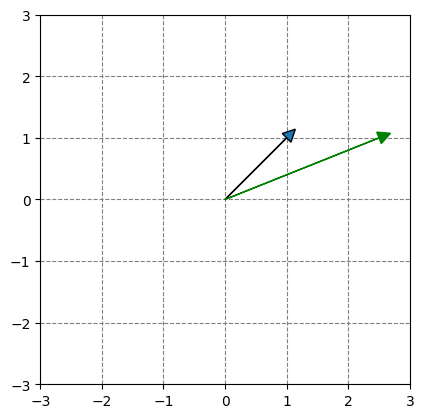

In [ ]:
A = np.array([0, 0])
B1 = np.array([1, 1])
B2 = M3@B1

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Finally, apply this shearing transformation to the image (which was sheared before with matrix M3) to restore **sheep.png**.

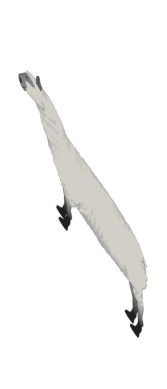

In [ ]:
sheared_img = cv.imread("/sheared_sheep.png")
plt.imshow(cv.cvtColor(sheared_img, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

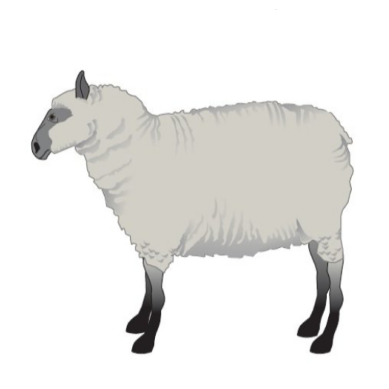

In [ ]:
restored_img = cv.warpAffine(sheared_img, get_horizontal_shear_matrix(1.5, True), (500, 500),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
plt.imshow(cv.cvtColor(restored_img, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

### 1.5 Translation matrix

Translation is a transformation that moves every point of a figure by a fixed distance.


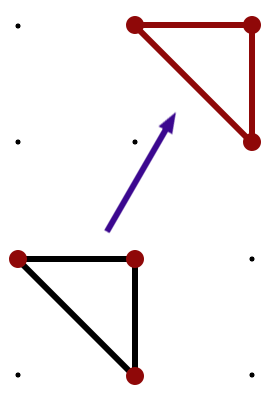

To construct a translation matrix for a 2D vector, one can follow these steps:

1. Choose the translation amounts along the x and y axes. Let's denote these as tx​ and ty​, respectively.

2. Build the translation matrix T using the chosen translation amounts. For a 2D vector, the translation matrix is typically represented as:

$T =
\begin{pmatrix}
  1 & 0 & tx \\
  0 & 1 & ty \\
  0 & 0 & 1 \\
 \end{pmatrix}
 $

Here, $tx$ and $ty$ are the translation amounts along the x and y axes, respectively.

Now, to apply translation to a 2D vector $(x,y)$ using this matrix, we can represent the vector in homogeneous coordinates as $\begin{pmatrix}
  x\\
  y\\
  1\\
 \end{pmatrix}$ and then multiply it by the translation matrix
$T$:

$T *
 \begin{pmatrix}
  x\\
  y\\
  1\\
 \end{pmatrix} =
 \begin{pmatrix}
  x+tx \\
  y+ty\\
  1 \\
 \end{pmatrix}$



For example, if we want to translate a vector by (20,25), we set $tx$ = 20 and $ty$ = 25 in the translation matrix $T$.

In [ ]:
def get_translation_matrix(translation_factor_x, translation_factor_y, resize=False):
  return np.array([
      [1., 0., translation_factor_x],
      [0., 1., translation_factor_y],
      [0., 0., 1.]
      ])
translation_factor_x = 20
translation_factor_y = 25
M4 = get_translation_matrix(translation_factor_x, translation_factor_y)
print("Translation matrix is")
print(M4)

Translation matrix is
[[ 1.  0. 20.]
 [ 0.  1. 25.]
 [ 0.  0.  1.]]


In [ ]:
A1 = np.array([0, 0])
B1 = np.array([10, 10])

A1_3 = np.append(A1, [1])
B1_3 = np.append(B1, [1])

A2 = np.matmul(M4, A1_3)[:2]
B2 = np.matmul(M4, B1_3)[:2]

ax = plt.axes()

ax.arrow(A1[0], A1[1], B1[0], B1[1], head_width=2, head_length=2)
ax.arrow(A2[0], A2[1], B2[0]-A2[0], B2[1]-A2[1], head_width=2, head_length=2, color='green')
plt.ylim(0,50)
plt.xlim(0,50)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Finally, apply the translation to the image (translated by (20, 25) before) to restore **sheep.png**.






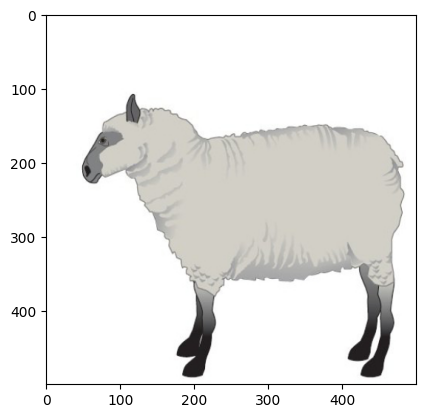

In [ ]:
translated_img = cv.imread("/translated_sheep.png")
plt.imshow(cv.cvtColor(translated_img, cv.COLOR_BGR2RGB))
plt.axis("on")
plt.show()

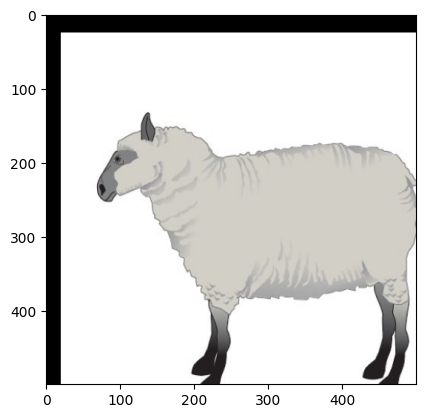

In [ ]:
translated = cv.warpAffine(translated_img, M4[:2], (500, 500))
plt.imshow(cv.cvtColor(translated, cv.COLOR_BGR2RGB))
plt.axis("on")
plt.show()

### 1.6 Mirror symmetry
Vertical mirror symmetry maps coordinates $(x, y)$ to $(-x,y)$.

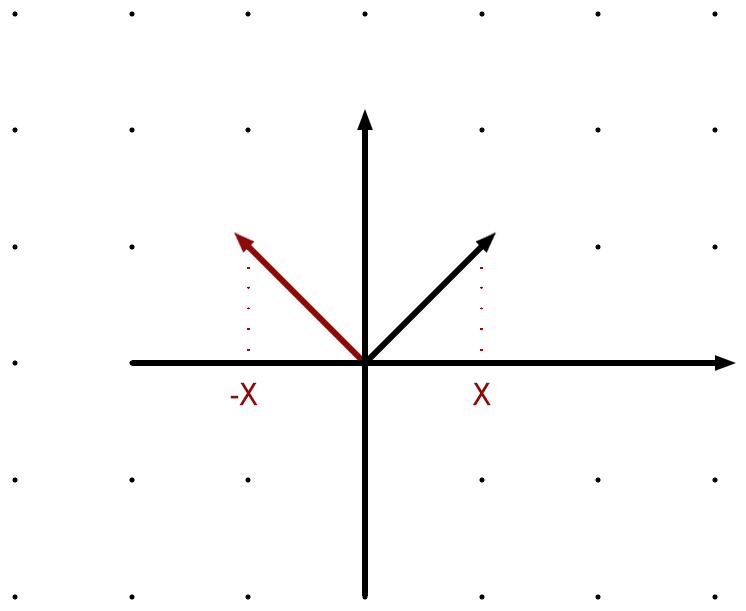

The transformation matrix for vertical mirror symmetry in a 2D space is given by:

$
M(mirror)  =
\begin{pmatrix}
-1 & 0 \\
0 & 1
\end{pmatrix}
$

This matrix is used to transform a 2D vector $A$ with coordinates $(x,y)$ to a new vector $A'$ with coordinates $(x′,y′)$, where the transformation is defined by:

$
\begin{pmatrix}
x' \\
y' \\
\end{pmatrix}
= M(mirror) *
\begin{pmatrix}
x \\
y \\
\end{pmatrix}
$

For the specific case of vertical mirror symmetry, the transformation results in $x′=−x$ and $y′=y′$. This means that the $x-coordinate$ is negated, causing a reflection across the vertical axis, while the y-coordinate remains unchanged. The transformation matrix reflects vectors across a vertical line, creating a mirror image.

In [ ]:
def get_horizontal_mirror_marix():
  return np.array([[-1.0, 0, 500],
                     [0, 1, 0]])

M5 = get_horizontal_mirror_marix()
print("Mirroring matrix is")
print(M5)

Mirroring matrix is
[[ -1.   0. 500.]
 [  0.   1.   0.]]


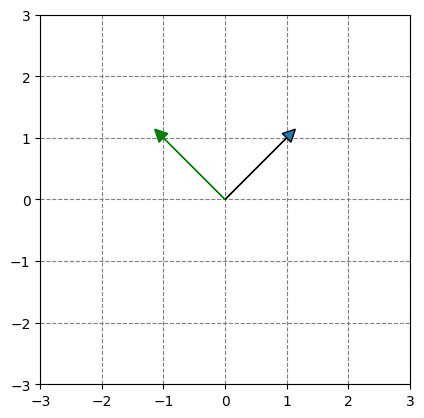

In [ ]:
A = np.array([0, 0])
B1 = np.array([1, 1])
B2 = np.dot(M5, np.append(B1, 0))[:2]


ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Apply a vertical symmetry matrix to restore **sheep.png**.

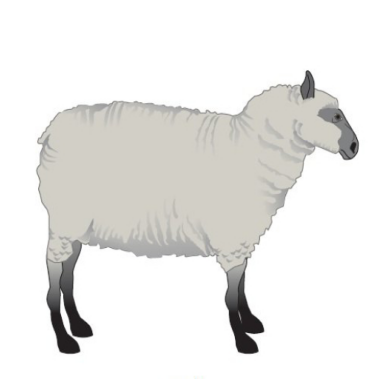

In [ ]:
mirrored_img = cv.imread("/mirrored_sheep.png")
plt.imshow(cv.cvtColor(mirrored_img, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

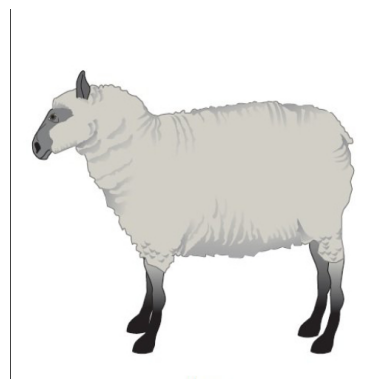

In [ ]:
restored_img =  cv.warpAffine(mirrored_img, get_horizontal_mirror_marix(), (500,500))
plt.imshow(cv.cvtColor(restored_img, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## 2.

### 2.1 Perspective shift matrix

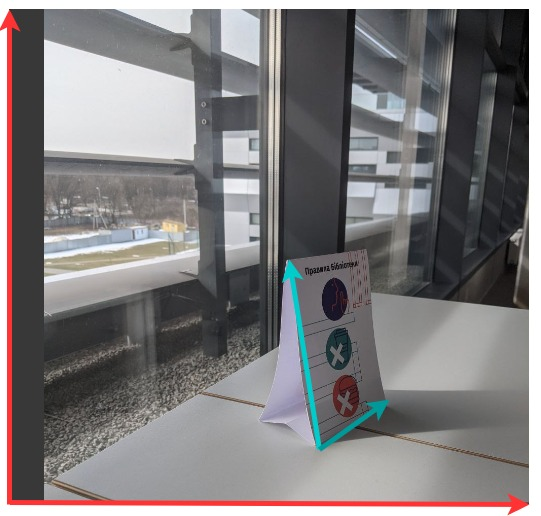

As you see on the picture above, the initial picture has a standard basis of red vectors. We want to transform all of the vectors in the picture so that the blue vectors will become the new basis.

To find this transformation matrix, you need to choose 4 points on the input image and corresponding points on the output image (3 of these points should not be collinear).In this case, the transformation matrix is a 3 by 3 matrix that satisfies the following equation, where ($x_i$, $y_i$) is the source vector and ($u_i$, $v_i$) is  the destination vector:

$u_i = \dfrac{c_{00}*x_i + c_{01}*y_i + c_{02}}{ c_{20}*x_i + c_{21}*y_i + c_{22}}$

$v_i = \dfrac{c_{10}*x_i + c_{11}*y_i + c_{12}}{c_{20}*x_i + c_{21}*y_i + c_{22}}$

In other words, we want to find a transformation that maps each of our initial 4 points $(x_i,y_i)$ to 4 points with new coordinates $(u_i, v_i)$.

Find coefficients $c_{ij}$ via solving the linear system containing source and destination coordinates and nine $c$ coefficients with numpy methods and apply it to an image so that the sign is clearly visible.
(Hint: $c_{22} = 1$)

First, start from explaining how the system was constructed.

**We will use this system to change the basis of vectors. First, you should select the coordinates of the vector whose basis we will change and the coordinates of the vector to which our vector will be changed.
So I have an image size 500 by 500 so I select 4 points for example - (0,0), (0,500), (500, 0), (500, 500) also we have to select 4 points on the flyer this is we will do the selection method using the cv.rectangle() function:**

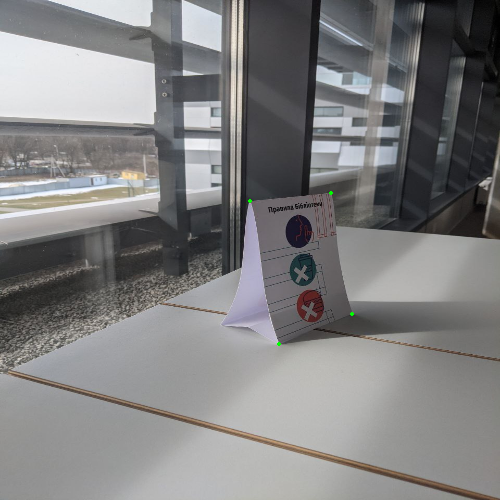

In [ ]:
img2_path = '/img2.jpg'
image = cv.imread(img2_path)
resized = cv.resize(image, (500,500))
cv.rectangle(resized, (330, 192), (330 + 1, 192 + 1), (0, 255, 0), 2)
cv.rectangle(resized, (351, 313), (351 + 1, 313 + 1), (0, 255, 0), 2)
cv.rectangle(resized, (249, 200), (249 + 1, 200 + 1), (0, 255, 0), 2)
cv.rectangle(resized, (278, 343), (278 + 1, 343 + 1), (0, 255, 0), 2)
cv2_imshow(resized)

**So, the coordinates of the points of the flyer are (330, 192), (351, 313), (249, 200), (278, 343). All these points are needed for constructing the matrix. Above we have equations for finding these points through using points of photo, so our system will have 8 equations - 4 for ${𝑥_𝑖}$,and 4 for ${𝑦_𝑖}$. For example, we will have 2 such equations:**

$$ {u_1} = 330 = \dfrac{c_{00}*500 + c_{01}* 500 + c_{02}}{ c_{20}*500 + c_{21}*500 + c_{22}}
$$

$${v_1} = 192 = \dfrac{c_{10}*500 + c_{11}*500 + c_{12}}{c_{20}*500 + c_{21}*500 + c_{22}}$$

**Now, let's try to constract matrix:**

From the equations above we have: $$(c_{20}*x_i + c_{21}*y_i + c_{22}) * u_i = c_{00}*x_i + c_{01}*y_i + c_{02} \\
(c_{20}*x_i + c_{21}*y_i + c_{22}) * v_i = c_{10}*x_i + c_{11}*y_i + c_{12}$$
Open brackets:
$$c_{20}*x_i*u_i + c_{21}*y_i*u_i + c_{22}*u_i = c_{00}*x_i + c_{01}*y_i + c_{02} \\
c_{20}*x_i*v_i + c_{21}*y_i*v_i + c_{22}*v_i = c_{10}*x_i + c_{11}*y_i + c_{12}$$
We know that $c_{22}$ = 1, so:
$$ c_{20}*x_i*u_i + c_{21}*y_i*u_i + u_i = c_{00}*x_i + c_{01}*y_i + c_{02} \\
c_{20}*x_i*v_i + c_{21}*y_i*v_i + v_i = c_{10}*x_i + c_{11}*y_i + c_{12}$$
Hence:
$$ c_{00}*x_i + c_{01}*y_i  + c_{02} - c_{20}*x_i*u_i - c_{21}*y_i*u_i = u_i \\
c_{10}*x_i + c_{11}*y_i  + c_{12} - c_{20}*x_i*v_i - c_{21}*y_i*v_i = v_i
$$

So, our matrix:

$$
\begin{bmatrix}
    x_{1} & y_{1} & 1 & 0 & 0 & 0 & -x_{1}*u_{1} & -y_{1}*u_{1}\\
    x_{2} & y_{2} & 1 & 0 & 0 & 0 & -x_{2}*u_{2} & -y_{2}*u_{2}\\
    x_{3} & y_{3} & 1 & 0 & 0 & 0 & -x_{3}*u_{3} & -y_{3}*u_{3}\\
    x_{4} & y_{4} & 1 & 0 & 0 & 0 & -x_{4}*u_{4} & -y_{4}*u_{4}\\
    0 & 0 & 0 & x_{1} & y_{1} & 1 & -x_{1}*v_{1} & -y_{1}*v_{1}\\
    0 & 0 & 0 & x_{2} & y_{2} & 1 & -x_{2}*v_{2} & -y_{2}*v_{2}\\
    0 & 0 & 0 & x_{3} & y_{3} & 1 & -x_{3}*v_{3} & -y_{3}*v_{3}\\
    0 & 0 & 0 & x_{4} & y_{4} & 1 & -x_{4}*v_{4} & -y_{4}*v_{4}\\
\end{bmatrix}$$

**If we multiply this matrix by the vector c, we will get our coordinates ${u_i}$ and ${v_i}$**

---
$$
c=
\begin{bmatrix}
    c_{00}\\
    c_{01}\\
    c_{02}\\
    c_{10}\\
    c_{11}\\
    c_{12}\\
    c_{20}\\
    c_{21}\\
\end{bmatrix}$$
There is no $c_{22}$ because we know that it is 1

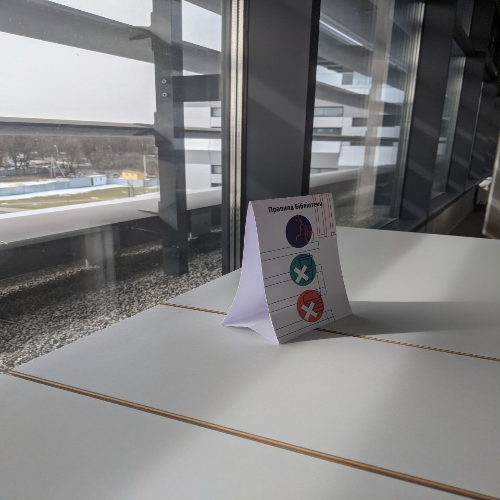

In [ ]:
img2_path = '/img2.jpg'
image2 = cv.imread(img2_path)
resized = cv.resize(image2, (500,500))
cv2_imshow(resized)


Implement the function that constructs a perspective shift matrix and apply it to the image.

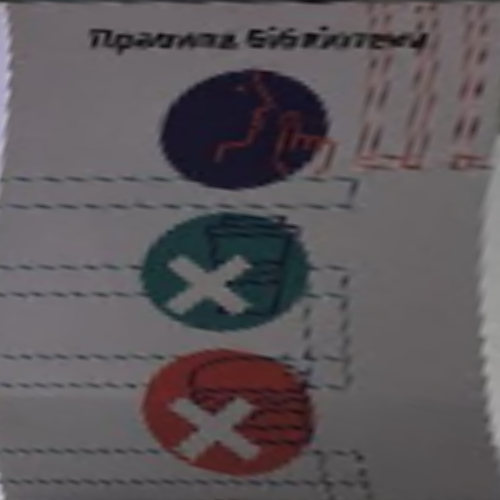

In [ ]:
def get_perspective_transform_matrix(source, destination):
  matrixA = np.zeros((8, 8))
  vectorb = np.zeros(8)
  for i in range(len(source)):
    x, y = source[i]
    u, v = destination[i]
    matrixA[i]= [x, y, 1, 0, 0, 0, -x*u, -y*u]
    matrixA[i+4] = [0, 0, 0, x, y, 1, -x*v, -y*v]
    vectorb[i] = u
    vectorb[i+4] = v
  coefs = np.linalg.solve(matrixA, vectorb)
  coefs = np.append(coefs, 1).reshape(3, 3)
  return coefs

rows,cols,ch = image2.shape

source_points = np.float32([[249, 200], [278, 343], [330, 192], [351, 313]])
destination_points = np.float32([[0, 0], [0, 500], [500, 0], [500, 500]])

perspective_shift_m = get_perspective_transform_matrix(source_points, destination_points)
transformed = cv.warpPerspective(resized, perspective_shift_m, (500, 500))
cv2_imshow(transformed)

### 2.2 Composition of transformations

Apply the following transformations to the original image in the specified order and observe the results displayed side-by-side.

1) Scaling by $(1.5, 2)$, rotation by $18^\circ$ and translation by $(10, 15)$.  
2) Translation by $(10, 15)$, scaling by $(1.5, 2)$, rotation by $18^\circ$.

---------------------------
Scaling by  (1.5,2) , rotation by  18∘  and translation by  (10,15)
---------------------------


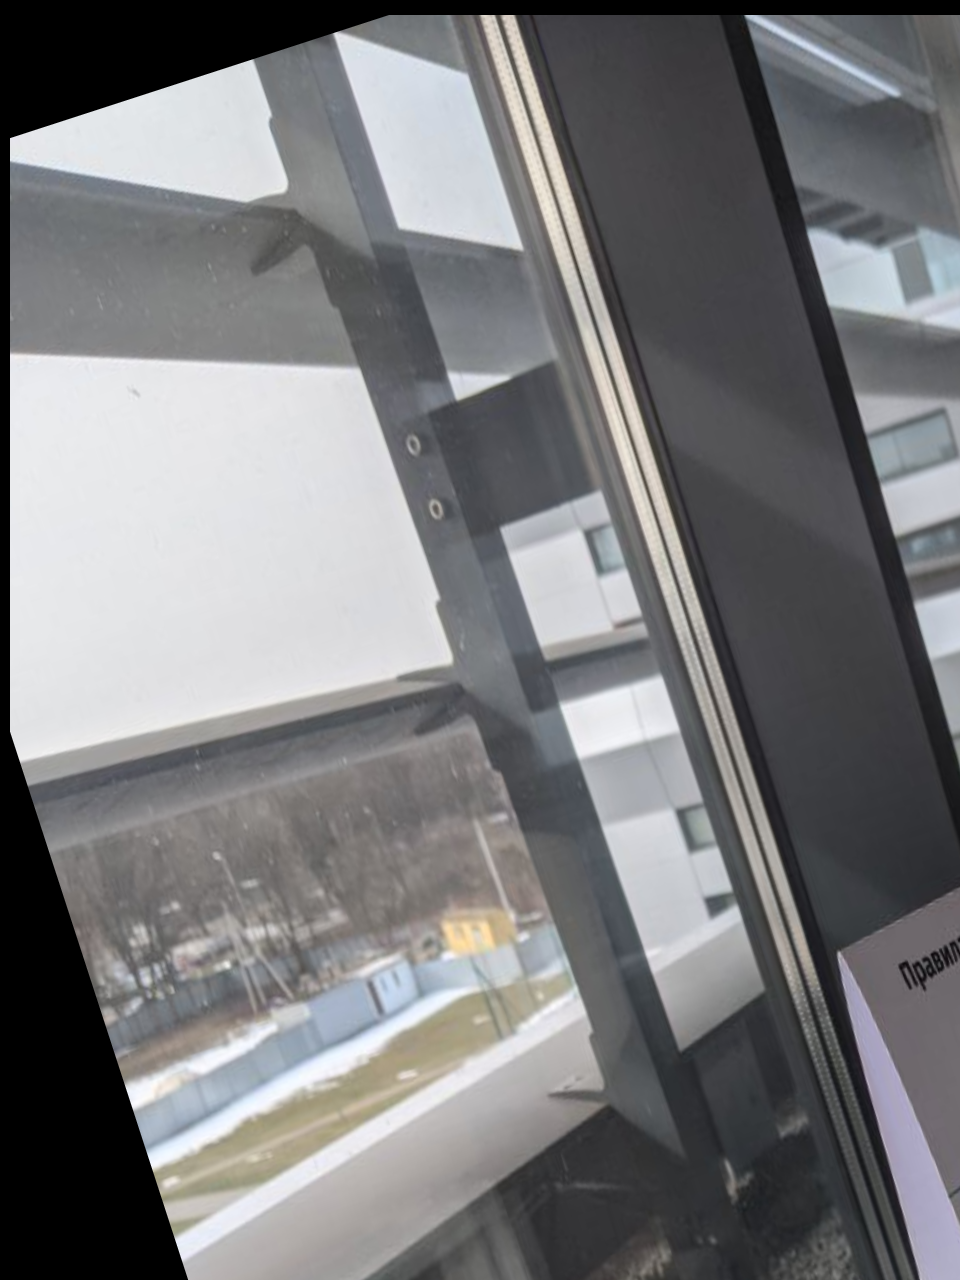

---------------------------
Translation by  (10,15) , scaling by  (1.5,2) , rotation by  18∘
---------------------------


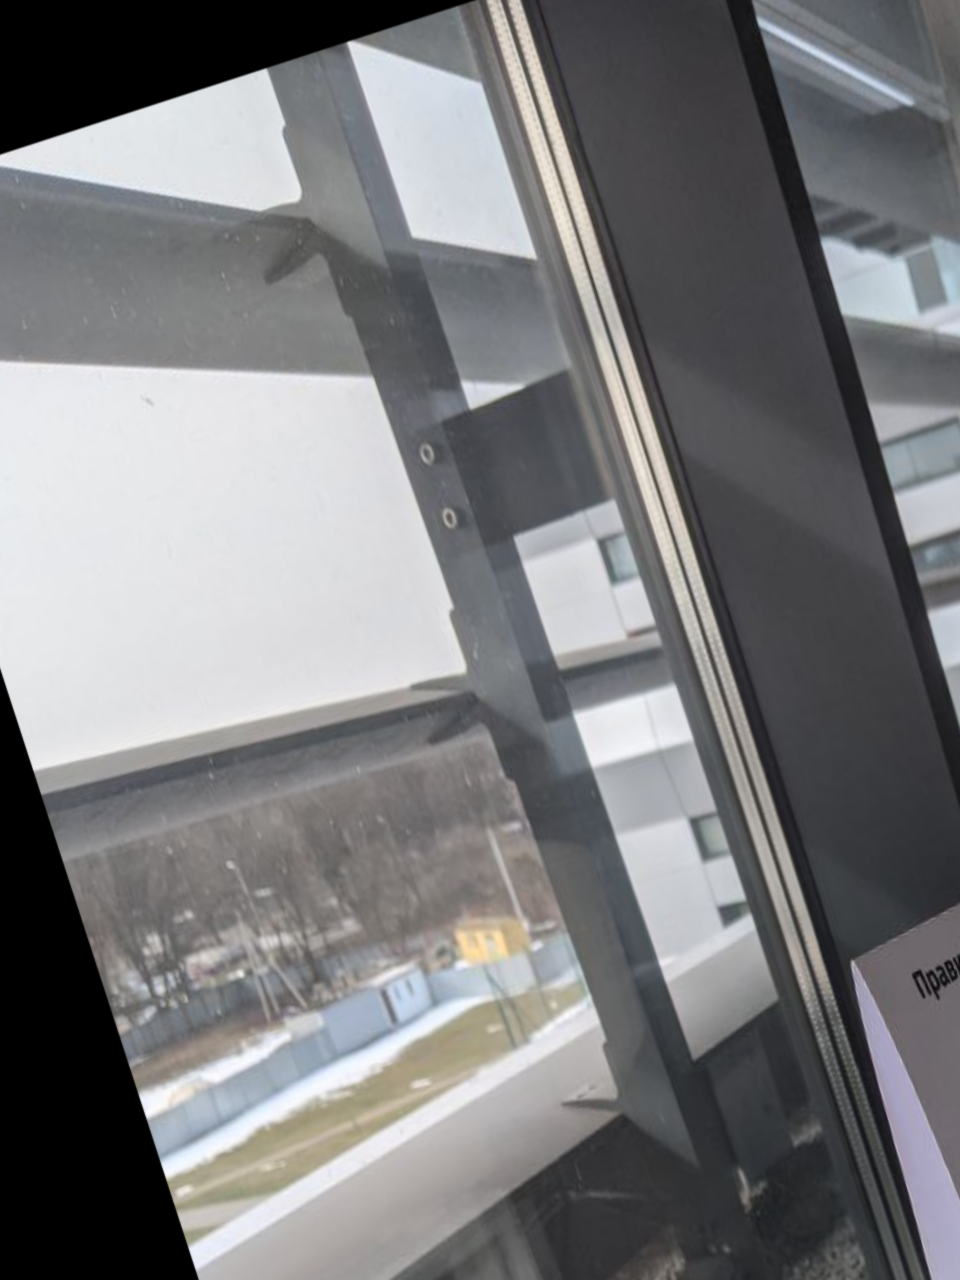

In [ ]:
print("---------------------------")
print("Scaling by  (1.5,2) , rotation by  18∘  and translation by  (10,15)")
print("---------------------------")

height, width = image2.shape[:2]

scaled_image = cv.resize(image2, None, fx=1.5, fy=2)
rotation_matrix = cv.getRotationMatrix2D((width/2, height/2), 18, 1)
rotated_image = cv.warpAffine(scaled_image, rotation_matrix, (width, height))
translation_matrix = np.float32([[1, 0, 10], [0, 1, 15]])
translated_image = cv.warpAffine(rotated_image, translation_matrix, (width, height))

cv2_imshow(translated_image)


print("---------------------------")
print("Translation by  (10,15) , scaling by  (1.5,2) , rotation by  18∘")
print("---------------------------")

##### YOUR CODE STARTS #####

height, width = image2.shape[:2]

translation_matrix = np.float32([[1, 0, 10], [0, 1, 15]])
translated_image = cv.warpAffine(image2, translation_matrix, (width, height))
scaled_image = cv.resize(translated_image, None, fx=1.5, fy=2)
rotation_matrix = cv.getRotationMatrix2D((width/2, height/2), 18, 1)
rotated_image = cv.warpAffine(scaled_image, rotation_matrix, (width, height))

cv2_imshow(rotated_image)

##### YOUR CODE ENDS #####

Do the outputs coincide? Is it possible to obtain same/different result changing the order of transformations? Which conditions should be met?

*As we can see, the result is a little bit different, in the first photo we can see text "Правил" and a line, but in the second photo there is no line and the text is "Прав". It seems that rotation in the second photo is larger than in the first one.*

*Order is significant because rotation and scaling are done concerning the origin of the coordinate system. Scaling an image that is centered produces a different result than scaling an image that has been moved away from the origin. Similarly, rotating an image that is centered produces a different result than rotating an image that has been moved away from the origin. All these transformations are applied relative to the altered coordinate system from the previous transformation, so if we translate our image and then rotate, scale, it also will be different than rotate, scale, and then translate*

## Summary

In this lab assignment, we met with linear transformations, especially, rotation, scaling, shearing, and translation, and considered mirror symmetry. We considered it in the first task and applied it to images. In the second task, we tried to change the basis of the vectors and discovered whether the order of transformations such as scaling, rotation, and translation affects the images

### What is a transformation matrix?

A transformation matrix is a mathematical representation used in linear algebra to describe transformations of geometric objects in a particular space. It is commonly used in computer graphics, robotics, and other fields where spatial transformations are needed.

In the context of 2D or 3D graphics, a transformation matrix typically represents translation (movement), rotation, scaling, or skewing of an object. These transformations can be represented by square matrices, where each element of the matrix corresponds to a specific transformation parameter.

For example, a 2D transformation matrix for translation might look like this:

$
\begin{pmatrix}
  1 & 0 & x \\
  0 & 1 & y \\
  0 & 0 & 1 \\
 \end{pmatrix}
 $

where $x$ and $y$ represent the amount of translation in the x and y directions, respectively.

Similarly, a 3D transformation matrix for rotation might look like this:

$
\begin{pmatrix}
  cos \theta & - sin \theta & 0 & 0\\
  sin \theta & cos \theta & 0 & 0 \\
  0 & 0 & 1 & 0 \\
  0 & 0 & 0 & 1 \\
 \end{pmatrix}
 $

### How its shape and values affect the resulting image? What is a shape of a typical transformation matrix that is applied to images; which factors affect its shape?

The shape and values of a transformation matrix affect the resulting image by specifying a particular type of geometric transformation. A typical transformation matrix for images looks like this:

$
\begin{pmatrix}
  a & b & c\\
  d & e & f \\
  0 & 0 & 1 \\
 \end{pmatrix}
 $

where $a$ and $e$ are responsible for scaling along the x and y axes, $b$ and $d$ for tilting, and $c$ and $f$ for translation along the corresponding axes.

Factors that affect the shape of a transformation matrix include scale values, tilt angle, and translation values. Changes to these parameters result in different types of transformations, such as enlarging, rotating, or moving the image.

### What can be a result of composition of transformations?

The composition of transformations refers to applying multiple transformations in sequence. The result of such a composition is a single transformation that combines the effects of all the transformations. We represent transformations as matrices. The composition of two transformations corresponds to the multiplication of their matrices. For transformations $ T_1 $ and $ T_2 $, the composition $ T_2 \circ T_1 $ can be presented as $ M_2 \cdot M_1 $, where $ M_1 $ and $ M_2 $ are the matrices that represents our transformations.

Also it is important to remember that the order of transformations matters. $ T_2 \circ T_1$ is not the same as $ T_1 \circ T_2 $. This is because matrix multiplication is not commutative. That's why, the order in which we apply transformations affect the final result. For example, if an object is first rotated and then translated, the final transformation is different from that of an object that is first translated and then rotated.


### What is a perspective shift transformation in terms of geometry?

A perspective shift transformation is a geometric transformation that transforms points in way that the lines of perspective converge, simulating the effect of viewing objects from a certain vantage point.

Mathematically, a perspective transformation can be represented by a 3x3 matrix in homogeneous coordinates. Perspective transformations can convert parallel lines in 3D space to converging lines in 2D space.

General form of a perspective transformation matrix:

$\begin{bmatrix} x' \\
y' \\
w' \\
\end{bmatrix}$ =
$\begin{bmatrix}
a &  b & c \\
d & e & f \\
g & h & i \\
\end{bmatrix} \begin{bmatrix}
x \\
y \\
1 \\
\end{bmatrix}$

In this transformation, the $(x', y', w') $  coordinates are the transformed points in homogeneous coordinates. To convert back to Cartesian coordinates, we will compute $ (x'/w', y'/w') $. The elements $ g, h, $ and $ i $ in the matrix are responsible for the perspective effect.